In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report

In [2]:
df=pd.read_csv("startup_funding.csv")

In [3]:
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [4]:
df.isnull().sum()

Sr No                   0
Date dd/mm/yyyy         0
Startup Name            0
Industry Vertical     171
SubVertical           936
City  Location        180
Investors Name         24
InvestmentnType         4
Amount in USD         960
Remarks              2625
dtype: int64

In [5]:
df.drop(columns=['Remarks'], inplace=True)

In [6]:
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"


In [7]:
print(df.columns)

Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType',
       'Amount in USD'],
      dtype='object')


In [8]:
df['Industry Vertical'] = df['Industry Vertical'].str.replace(r'\xa0', ' ', regex=True)

In [9]:
df['Date dd/mm/yyyy'] = pd.to_datetime(df['Date dd/mm/yyyy'], format='%d/%m/%Y', errors='coerce')
df['Month']=df['Date dd/mm/yyyy'].dt.month
df['Year']=df['Date dd/mm/yyyy'].dt.year

In [10]:
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Month,Year
0,1,2020-01-09,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",1.0,2020.0
1,2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",1.0,2020.0
2,3,2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",1.0,2020.0
3,4,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",1.0,2020.0
4,5,2020-01-02,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",1.0,2020.0


## Before removing , from "Amount in USD" column we need to handle missing values in the coulumn alongwith it

In [11]:
df['Amount in USD'] = (df['Amount in USD'].astype(str).str.replace(',', '', regex=True).str.replace(r'[^\d.]', '', regex=True))

In [12]:
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Month,Year
0,1,2020-01-09,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000,1.0,2020.0
1,2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394,1.0,2020.0
2,3,2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860,1.0,2020.0
3,4,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000,1.0,2020.0
4,5,2020-01-02,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000,1.0,2020.0


In [13]:
df.duplicated().sum()

0

## Funding Trends over Time

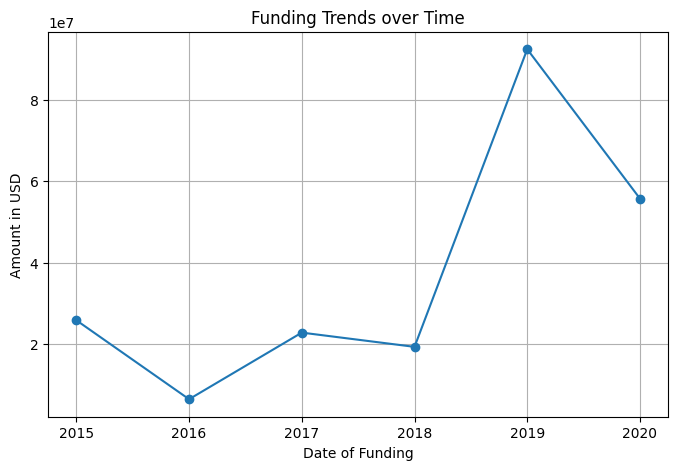

In [14]:
df['Amount in USD'] = pd.to_numeric(df['Amount in USD'], errors='coerce')
plt.figure(figsize=(8,5))
df.groupby(df['Year'])['Amount in USD'].mean().plot(kind='line', marker='o')
plt.title("Funding Trends over Time")
plt.xlabel("Date of Funding")
plt.ylabel("Amount in USD")
plt.grid()
plt.show()

In [15]:
mean_funding_per_year = df.groupby('Year')['Amount in USD'].mean()
mean_funding_per_year

Year
2015.0    2.590252e+07
2016.0    6.532574e+06
2017.0    2.287129e+07
2018.0    1.937924e+07
2019.0    9.238970e+07
2020.0    5.574389e+07
Name: Amount in USD, dtype: float64

## Top Funded Industry Vertical
### The values show the total funding received by top 10 most funded industry

In [16]:
top_funded_indust=df.groupby("Industry Vertical")['Amount in USD'].sum().sort_values(ascending=False)
top_funded_indust.head(10)

Industry Vertical
Consumer Internet                                     6.253084e+09
eCommerce                                             5.002533e+09
Transportation                                        3.916632e+09
Technology                                            2.229708e+09
\\xc2\\xa0News Aggregator mobile app                  2.020000e+09
\\xc2\\xa0Premium Loyalty Rewards Point Management    2.019350e+09
\\xc2\\xa0Online Jewellery Store                      2.016200e+09
\\xc2\\xa0Casual Dining restaurant Chain              2.010000e+09
Finance                                               1.971438e+09
ECommerce                                             1.878798e+09
Name: Amount in USD, dtype: float64

### The values given below show the top 10 industry with the highest average funding per deal

In [17]:
top_funded_indust=df.groupby("Industry Vertical")['Amount in USD'].mean().sort_values(ascending=False)
top_funded_indust.head(10)

Industry Vertical
\\xc2\\xa0News Aggregator mobile app                  2.020000e+09
\\xc2\\xa0Premium Loyalty Rewards Point Management    2.019350e+09
\\xc2\\xa0Online Jewellery Store                      2.016200e+09
\\xc2\\xa0Casual Dining restaurant Chain              2.010000e+09
Transportation                                        9.791581e+08
E-Commerce & M-Commerce platform                      6.800000e+08
Ecommerce Marketplace                                 5.000000e+08
Car Aggregator & Retail Mobile App                    5.000000e+08
Cab Aggregator                                        4.000000e+08
Online Marketplace                                    3.500715e+08
Name: Amount in USD, dtype: float64

## Funding Distribution by Investment Type

In [34]:
import string
import plotly.graph_objects as go

# Function to remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

# Fixing column name and applying transformation
df['InvestmentnType'] = df['InvestmentnType'].astype(str).apply(remove_punctuation)

# Mapping incorrect investment types to standardized names
funding_map = {
    "SeedAngel Funding": "Seed Angel Funding",
    "SeedFunding": "Seed Funding",
    "PrivateEquity": "Private Equity",
    "Crowd funding": "Crowd Funding",
    "Angel  Seed Funding": "Seed Angel Funding",
    "Seed  Angel Funding": "Seed Angel Funding",
    "Seed Angle Funding": "Seed Angel Funding",
    "Seed  Angle Funding": "Seed Angel Funding",
    "SeednFunding": "Seed Funding",
    "Seed funding": "Seed Funding",
    "Seed Round": "Seed Funding",
    "preSeries A": "PreSeries A",
    "preseries A": "PreSeries A",
    "Pre Series A": "PreSeries A"
}

# **Fixed Line:** (Correcting the syntax error)
df['InvestmentnType'] = df['InvestmentnType'].replace(funding_map)

def horizontal_bar_chart(srs, color):
    return go.Bar(
        x=srs.values[::-1],
        y=srs.index[::-1],
        orientation='h',
        showlegend=False,
        marker=dict(color=color)
    )

# Getting top 10 investment types by count
cnt_srs = df['InvestmentnType'].value_counts().head(10)

# Setting up layout for the chart
layout = go.Layout(
    title="Count of Investment type",
    title_x=0.5,
    font=dict(size=14),
    width=800,
    height=600,
)

# Creating and displaying the figure
fig = go.Figure(data=[horizontal_bar_chart(cnt_srs, "#1E90FF")], layout=layout)
fig.show(renderer='iframe')


### The analysis of investment types reveals that Private Equity and Seed Funding are the most common forms of investment

## Top cities for startup funding

In [33]:
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))
    
df['City  Location'] = df['City  Location'].astype(str).apply(remove_punctuation)
location_map = {
    "Bengaluru": "Bangalore",
    "Delhi": "NCR",
    "New Delhi": "NCR",
    "Gurugram": "NCR",
    "Gurgaon": "NCR",
    "Noida": "NCR"
}
df['City  Location'] = df['City  Location'].replace(location_map)

def horizontal_bar_chart(srs, color):
    return go.Bar(
        x=srs.values[::-1],
        y=srs.index[::-1],
        orientation='h',
        showlegend=False,
        marker=dict(color=color)
    )


cnt_srs = df['City  Location'].value_counts().head(14)
layout = go.Layout(
    title="Number of funding deals in each location",
    title_x=0.5,
    font=dict(size=14),
    width=800,
    height=800,
)


fig = go.Figure(data=[horizontal_bar_chart(cnt_srs, "#1E90FF")], layout=layout)
fig.show(renderer='iframe')

In [24]:
top_cities=df.groupby('City  Location')['Amount in USD'].sum().sort_values(ascending=False)
top_cities.head(5)

City  Location
Bangalore    1.136159e+10
Bengaluru    7.112921e+09
Mumbai       4.921185e+09
New Delhi    3.017817e+09
Gurgaon      3.005296e+09
Name: Amount in USD, dtype: float64

## Which industries are favored by investors for funding?

In [25]:
print(df.columns)

Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType',
       'Amount in USD', 'Month', 'Year'],
      dtype='object')


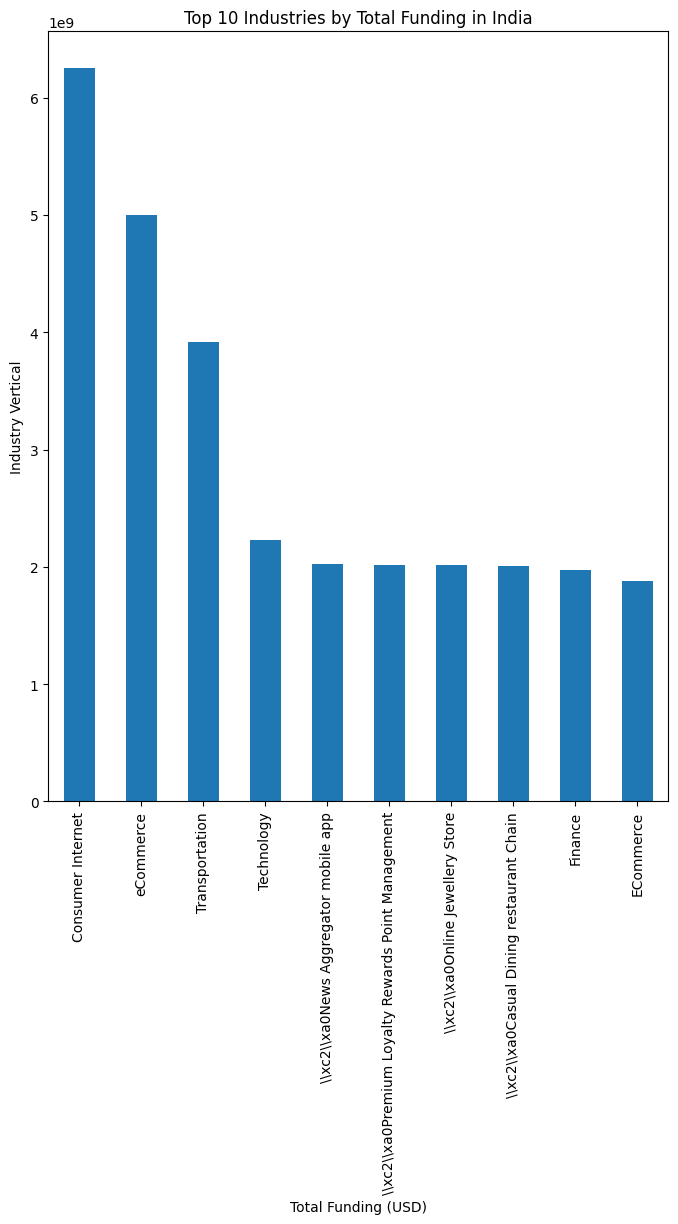

In [26]:
favoured_industry=df.groupby('Industry Vertical')['Amount in USD'].sum().sort_values(ascending=False).head(10)
favoured_industry.plot(kind='bar',figsize=(8,10))
plt.xlabel("Total Funding (USD)")
plt.ylabel("Industry Vertical")
plt.title("Top 10 Industries by Total Funding in India")
plt.show()

## Who are the important investors in the Indian Ecosystem?

C:\Users\anshu\AppData\Local\Temp\ipykernel_27212\891196136.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




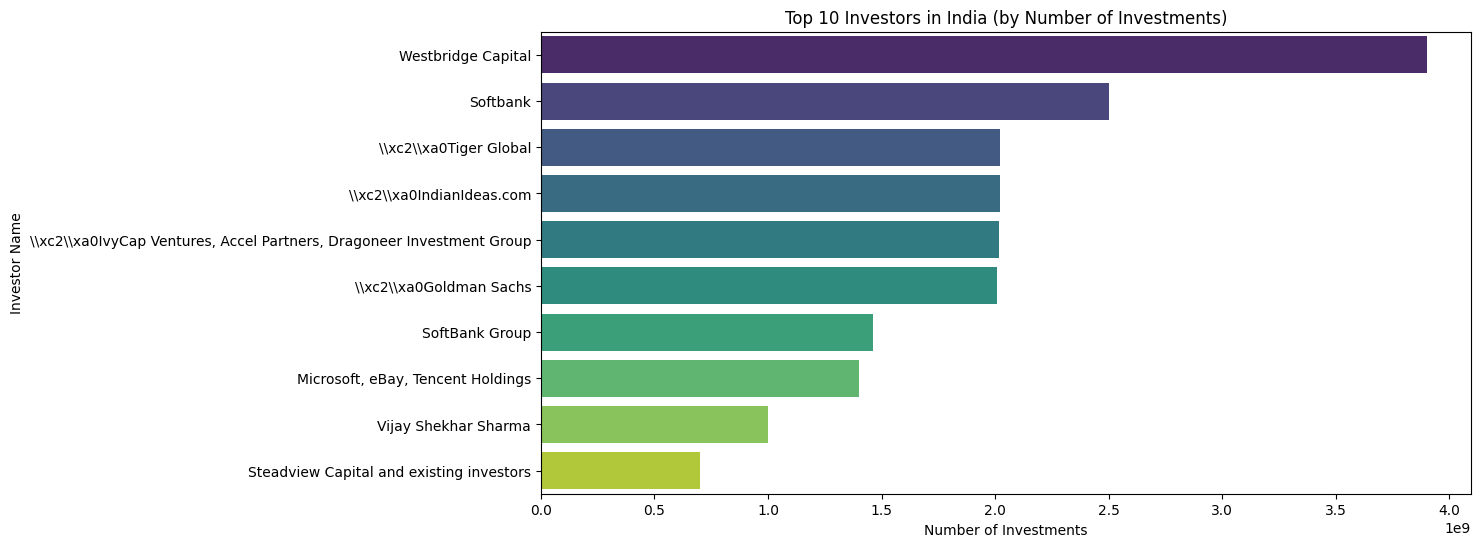

In [27]:
top_funding_investors = df.groupby("Investors Name")["Amount in USD"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_funding_investors.values, y=top_funding_investors.index, palette="viridis")
plt.xlabel("Number of Investments")
plt.ylabel("Investor Name")
plt.title("Top 10 Investors in India (by Number of Investments)")
plt.show()


## How much funds do startups generally get in India?

count    2.077000e+03
mean     2.233217e+07
std      1.494657e+08
min      2.000000e+01
25%      4.700000e+05
50%      1.750000e+06
75%      8.200000e+06
max      3.900000e+09
Name: Amount in USD, dtype: float64


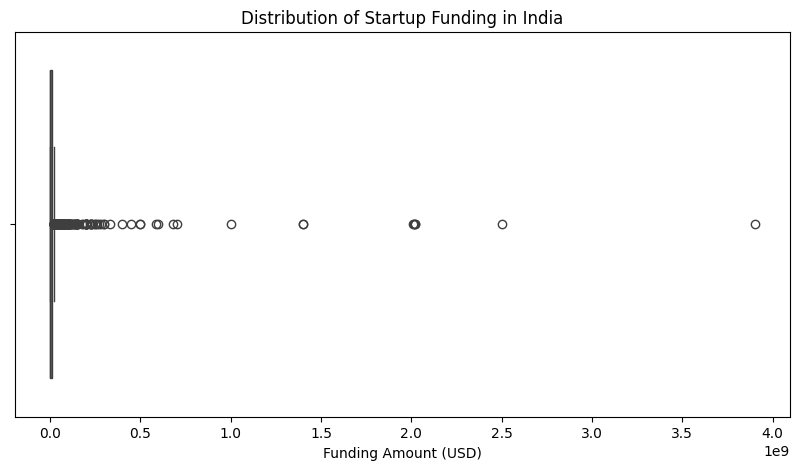

In [28]:
print(df["Amount in USD"].describe())

plt.figure(figsize=(10,5))
sns.boxplot(x=df["Amount in USD"])
plt.xlabel("Funding Amount (USD)")
plt.title("Distribution of Startup Funding in India")
plt.show()

### The median funding amount (50th percentile) tells how much startups usually raise.
### The outliers show, that they are big unicorn startups raising huge rounds.